# <a id='toc1_'></a>[__Матричные разложения__](#toc0_)

**Содержание**<a id='toc0_'></a>    
- [__Матричные разложения__](#toc1_)    
  - [__Импорты__](#toc1_1_)    
  - [__Собственные векторы, собственные значения__](#toc1_2_)    
  - [__Спектральное разложение матрицы__](#toc1_3_)    
  - [__Рекомендательные системы__](#toc1_4_)    
    - [__Collaborative Filtering__](#toc1_4_1_)    
      - [__Пример__](#toc1_4_1_1_)    
  - [__Сингулярное разложение матрицы (SVD)__](#toc1_5_)    
    - [__Примеры типичных задач__](#toc1_5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

***
## <a id='toc1_1_'></a>[__Импорты__](#toc0_)

In [1]:
import numpy as np
import sympy as sym

***
## <a id='toc1_2_'></a>[__Собственные векторы, собственные значения__](#toc0_)

Пусть дано линейное преобразование $A : \R^n \rightarrow \R^n$.

__Собственным вектором__ преобразования $A$ называется ненулевой вектор $\vec{v} \in \R^n$ такой, что 
$$\Large A\vec{v} = \lambda \vec{v}$$
для какого-нибудь числа $\lambda \in \R$. Иначе говоря, собственный вектор преобразования это такой вектор, действуя на который преобразование изменяет только его длину, но не направление.

__Собственными числами__ преобразования $A$ называются корни уравнения 
$$\Large \det(A - \lambda\text{E}) = 0$$

In [2]:
M = sym.Matrix([[-13, 3], [-9, -1]])
M.eigenvects()

[(-10,
  1,
  [Matrix([
   [1],
   [1]])]),
 (-4,
  1,
  [Matrix([
   [1/3],
   [  1]])])]

In [3]:
M = np.array([[-13, 3], [-9, -1]])
ev = np.linalg.eig(M)[1]
ev

array([[-0.70710678, -0.31622777],
       [-0.70710678, -0.9486833 ]])

In [4]:
ev[0] / ev[1]

array([1.        , 0.33333333])

In [5]:
def isEigenvec(M, v):
    ev = np.linalg.eig(M)[1]
    norm = np.linalg.norm(v)
    if norm:
        return np.any(np.isclose(np.abs(ev.T @ v / norm), 1))
    return False

Идея: если тестируемый вектор __`v`__ — собственный вектор матрицы __`M`__, то он коллинеарен вектору, о котором доподлинно известно, что он собственный. Коллинеарность проверяется близостью к единице выраженного через скалярное произведение и норму вектора косинуса угла между тестируемым и собственным векторами — столбцами __`ev`__. Эти собственные векторы уже нормированы:

In [6]:
np.linalg.norm(ev, axis=0)

array([1., 1.])

и потому делить на их (единичные) длины не требуется. Тестируемый вектор может быть как сонаправленным собственному вектору, так и противоположно направленным — оба эти случая удовлетворяют условию собственности (ограничения на знак $\lambda$ в определении нет). Поэтому с единицей сравнивается модуль косинуса. Меняя tolerance функции __`numpy.isclose`__, можно регулировать строгость сравнения, определяя, какие векторы считать "достаточно коллинеарными", а какой разлет уже критичным. Также учтено, что нулевым вектором не "владеет" никто. 

In [7]:
isEigenvec(M, np.array([2, 2]))

True

In [8]:
isEigenvec(M, np.array([1, 3]))

True

***
## <a id='toc1_3_'></a>[__Спектральное разложение матрицы__](#toc0_)

20/02/2023

Коварство матричных цепочек кроется в двух вещах.

Во-первых, матрицы могут ошибочно восприниматься как существительные, хотя это — _глаголы_. Ведь это преобразования, отображения, функции, а значит, — действия. А поскольку это действия, а не сущности, знак равенства следует воспринимать не как тождество объектов, а как выражение эквивалентности направленного действия — как если бы исполнитель обладал всей полнотой информации сразу. Объект же приложения этого действия на письме отсутствует — лишь умозрительно подразумевается, что он появится, когда мы начнем приводить все эти глаголы в движение. 

Во-вторых, матрица действует на объект слева, и потому цепочку преобразований удобнее читать справа налево.

Итак, представьте, что из окружающего нас привычного, "стандартнобазисного", мира мы берем некий объект, требующий обработки, трансформации, и мы держим наш объект в руках в конце строки
$$\Large A = V \cdot \Lambda \cdot V^{-1}$$
Работать с этим объектом "как есть" неудобно — он повернут под углом, и я не уверен, что при обработке смогу правильно соблюсти пропорции, что Мона Лиза, часто используемая в источниках для визуализации собственных векторов, не превратится в шарж на саму себя. Поэтому я выполняю $V^{-1}$, временно перенося объект в некое "волшебное зазеркалье". В чем его прелесть? В том, что с каждым направлением, или спектром, осью я могу работать отдельно — трансформировать независимо от остальных, ведь собственные вектора линейно независимы. Лямбда-большая $\Lambda$, стоящая в центре, по сути, для нас blueprint — таблица, в которой числами указано, как именно требуется трансформировать объект по каждой из существующих независимых осей. Мы просто поосно следуем инструкции — растягиваем или сжимаем.

После того, как работа сделана, мы возвращаем наш объект в обычную реальность — поворачиваем его в исходную позу, ровно тем же путем, только в обратном направлении: $V$.

Что стоит слева от равенства? $A$. Это таблица цифр, которая привела бы нас к тому же результату трансформации, как если бы мы совсем не знали ничего ни о пространстве, ни о движении в нем, действуя "вдруг", по безотчетному наитию. Ведь цифрам все равно — получите ли вы их сразу или цепочкой промежуточных вычислений.

Стоит, пожалуй, уточнить метафору поворота. Смена базиса это не поворот объекта как движение в некоем статичном "мировом пространстве" — здесь двигается не объект, а скорее глаз наблюдателя, который фиксирует другие, измененные координаты, в других, измененных единицах измерения. Это все, в сущности, условно: можно думать, что объект двигается на фоне неподвижной сетки, а можно, что это сетка, следуя наблюдателю, двигается относительно неподвижного натюрморта.

***
## <a id='toc1_4_'></a>[__Рекомендательные системы__](#toc0_)

* __Content Based Filtering__: feature engineering, feature selection, трудоемкость разметки каждого объекта каждым признаком;
* __Collaborative Filtering__: сразу требуется большое количество оценок (_проблема холодного старта_).

См. в портфолио: _Коллаборативная фильтрация в задаче подбора контента с наивысшим предсказанным рейтингом._

***
### <a id='toc1_4_1_'></a>[__Collaborative Filtering__](#toc0_)

$U_{k \times n}$, матрица из $n$ пользователей-столбцов, хранящих веса каждого из $k$ параметров индивидуальных предпочтений: больше вес — выше одобрение параметра.

$M_{k \times m}$, матрица из $m$ фильмов-столбцов, хранящих веса каждого из $k$ параметров описания фильмов: больше вес — выше степень соответствия фильма данной категории, параметру и т.д.

$A_{n \times m}$, матрица реальных оценок пользователей: $a_{ij}$ — оценка $i$-ым пользователем $j$-ого фильма.

$\hat{A}_{n \times m} = U^TM$, матрица предсказанных оценок пользователей: $\hat{a}_{ij} = \vec{u_i}^T\vec{m_j} = \langle\vec{u_i},\vec{m_j}\rangle$.

Квадратичная функция потерь:
$$\Large L(U, M) = \sum_{a_{ij} \ne *} (a_{ij} - \langle\vec{u_i},\vec{m_j}\rangle)^2$$

***
#### <a id='toc1_4_1_1_'></a>[__Пример__](#toc0_)

_Найти значение функции потерь, если_ $A = \begin{pmatrix}
-1 & * & -1\\
0 & * & *\\
0 & * & 1
\end{pmatrix}$.

In [9]:
U = np.array([[0.5, 0, 0.25],
              [-1, 0.75, 0.5]])

M = np.array([[-0.5, -0.25, 0.5],
              [0.5, 0.5, 0.75]])

A_true = np.array([[-1, np.nan, -1],
                   [0, np.nan, np.nan],
                   [0, np.nan, 1]])

0.71875

In [ ]:
A_true = np.ma.array(A_true, mask=np.isnan(A_true))
A_pred = U.T @ M
((A_true - A_pred)**2).sum()

***
## <a id='toc1_5_'></a>[__Сингулярное разложение матрицы (SVD)__](#toc0_)

У любой матрицы $A_{m \times n}$ существует разложение в произведение трех матриц 

$$\Large A = U \Sigma V^*,$$

где $U_{m \times m}$ и $V_{n \times n}$ — унитарные $(UU^* = \text{E},\,VV^* = \text{E})$, а значит, ортогональные матрицы, состоящие из левых и правых __сингулярных векторов__ соответственно ($V^*$ — сопряженно-транспонированная $V$),

$\Sigma_{m \times n}$ — диагональная матрица неотрицательных вещественных чисел, называемых __сингулярными числами__ матрицы $A$. Для каждого сингулярного числа $\sigma$ существуют два единичных вектора $\vec{u}$ и $\vec{v}$ такие, что $A\vec{v} = \sigma \vec{u}$ и $A^* \vec{u} = \sigma \vec{v}$, — левый и правый сингулярные векторы соответственно. Левые сингулярные — собственные векторы матрицы $AA^*$, правые — собственные $A^*A$. 

$\Sigma$ растягивает $i$-ый базисный вектор в $\sigma_i$ раз. Если $n \ne m$, то $\Sigma$ меняет число координат векторов с $n$ на $m$: либо отрезает несколько последних координат, либо добавляет несколько нулевых координат в конец вектора.

Геометрический смысл сингулярного разложения в двумерном случае:

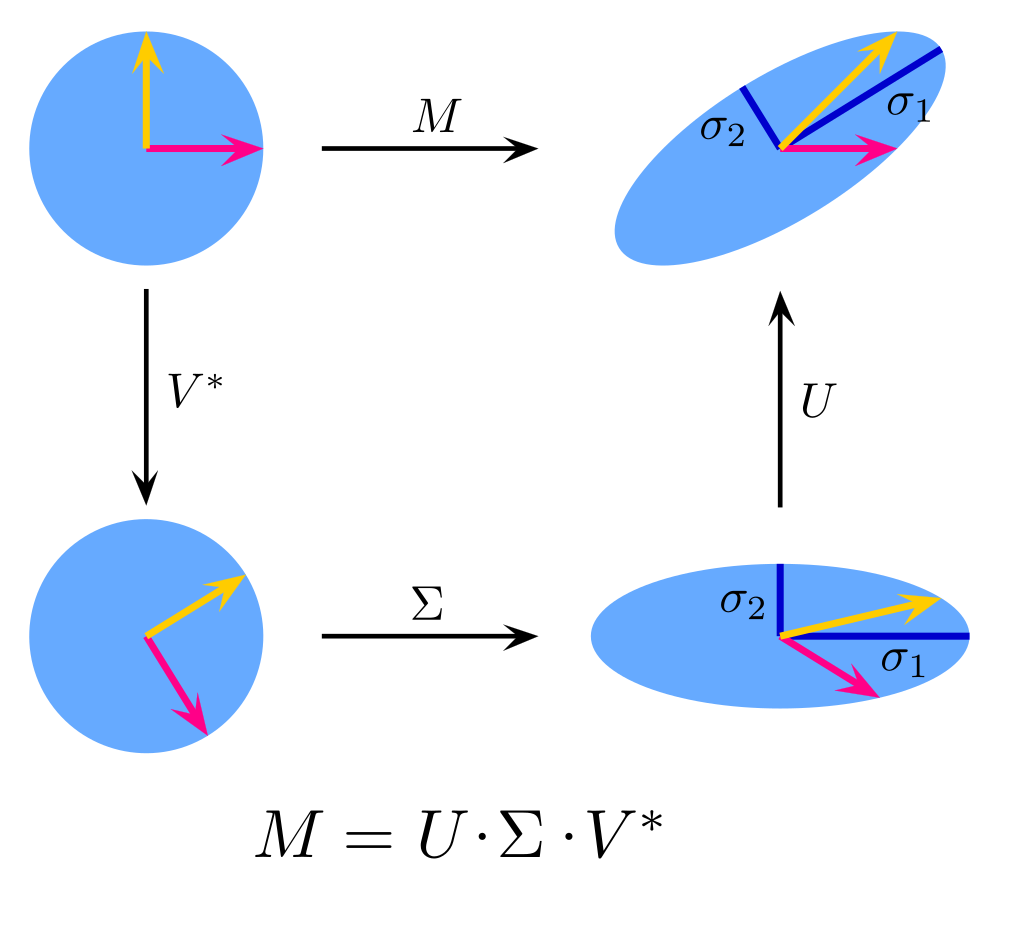

$A_k = U \Sigma_k V^T$ — наилучшее по норме Фробениуса приближение матрицы $A$ среди всех матриц рангом не больше $k$. Квадрат нормы Фробениуса, по определению, это сумма квадратов разностей соответствующих элементов матриц. $\Sigma_k$ получается из $\Sigma$ заменой нулями всех диагональных элементов, кроме $k$ наибольших (первых, если элементы $\Sigma$ упорядочены по невозрастанию). "Сохраненная" в результате перехода к $\Sigma_k$ информация называется __объясненной дисперсией__, "потерянная" — __необъясненной дисперсией__. См. _Метод главных компонент_ (PCA, _Principal component analysis_).

Перед применением SVD признаки необходимо нормировать. См. [__sklearn.preprocessing.StandardScaler__](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn-preprocessing-standardscaler), [__scipy.linalg.svd__](https://scipy.github.io/devdocs/reference/generated/scipy.linalg.svd.html#scipy-linalg-svd).

***
### <a id='toc1_5_1_'></a>[__Примеры типичных задач__](#toc0_)

* Даны диагональные элементы $\Sigma$ и ранг приближающей матрицы. Найти долю утраченной информации.
* Даны диагональные элементы $\Sigma$. Приближение обязано сохранить не менее данной доли информации. Найти ранг приближающей матрицы.

In [10]:
def varRatio(sigma, rank=None):
    sigma = sorted(sigma, reverse=True)
    full = np.cumsum(np.square(sigma))
    expl = full[rank-1] if rank else full
    return expl / full[-1]

In [11]:
def infoRatio(sigma, *, rank, loss=False):
    # loss=False means info retained
    if rank not in range(1, len(sigma)+1):
        raise ValueError('Incorrect rank')
    return abs(loss - varRatio(sigma, rank=rank))

In [12]:
def minRank(sigma, *, thres):
    if thres < 0 or thres > 1:
        raise ValueError('Incorrect threshold')
    return np.argmax(varRatio(sigma) >= thres) + 1

In [13]:
sigma = [8, 5, np.sqrt(11), 3, 1, 1, 0]
round(infoRatio(sigma, rank=3, loss=True), 3)

0.099

In [14]:
sigma = [9, np.sqrt(37), 4, 2, np.sqrt(3), np.sqrt(3), 1, 0]
minRank(sigma, thres=0.8)

2

***